# Baseline Model Creation

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Stylesheet
plt.style.use('seaborn-v0_8')

In [83]:
df_subset_clean = pd.read_csv("Wii_clean.csv")

### Detecting Collinearity

If the correlation between some independant variales is high, it is a sign of collinearity and we will only including one of those predictors in our models and omit the others. 

### Heatmap

Using Seaborn heatmap, we can see there is collinearity with grip strength in right hand (`grip_r1`) and left hand (`grip_l1`). This makes sense as participants strength in terms of their own left and right hands tend to be heavily correlated. We can also observe collinearity with sex and both hands grip strength. This can be explained with males having a higher grip strength than females generally. 

<Axes: >

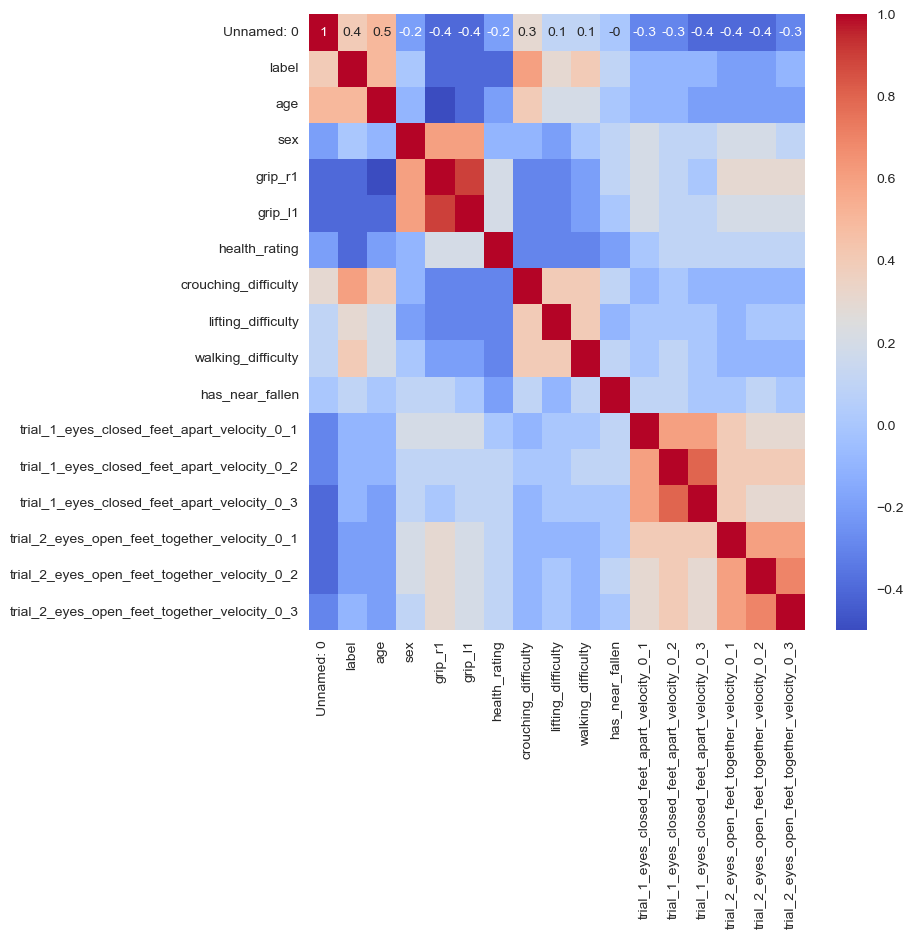

In [84]:
X = df_subset_clean.drop(columns = "has_fallen")
y = df_subset_clean["has_fallen"]

plt.figure(figsize=(8, 8))
sns.heatmap(X.corr().round(1), cmap="coolwarm", annot=True)

For our logistic regression model, we will only consider the left hand grip strength and omit the right hand since we can assume the majority of participants are right hand dominant and thus, left hand grip strength may be a stronger correlator to an elderly's overall strength. We will also omit `sex` column as that has collinearity with grip strength.

# Model 1 - Logistic Regression

Out of 206 participants, 86 people have experienced a fall (in other words, 42%). This gives our baseline accuracy "score to beat".

|          | Predictive Variables   | Accuracy | Comments                                                                  |
|----------|------------------------|----------|---------------------------------------------------------------------------|
| Baseline |                        | 42%      | Blindly predicting '1' for all data gives 42% accuracy.                   |

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
# define our X and y
X = df_subset_clean["grip_l1"]
y = df_subset_clean["has_fallen"]

X = X.values.reshape(-1,1)

# Train and test split
# Test size = 20% of total data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42
)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# logistic regression model
logreg = LogisticRegression() # instantiate
logreg.fit(X_train, y_train) # fit
y_predict = logreg.predict(X_test) # test

test_accuracy = accuracy_score(y_test, y_predict)

print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.6


|          | Predictive Variables   | Accuracy | Comments                                                                  |
|----------|------------------------|----------|---------------------------------------------------------------------------|
| Baseline |                        | 42%      | Blindly predicting '1' for all data gives 42% accuracy.                   |
| Model 1  | Left hand grip strength| 60%      | Grip strength has an 18% improvement from baseline as a predicitve variable |
|          |                        |          |                                                                           |

In [86]:
# We will redefine X variable with an additional independant varible to see if it improves our model accuracy
X = df_subset_clean[["grip_l1", "has_near_fallen"]]

# Train and test split
# Test size = 20% of total data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42
)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# logistic regression model
logreg = LogisticRegression() # instantiate
logreg.fit(X_train, y_train)  # fit
y_predict = logreg.predict(X_test) # test

test_accuracy = accuracy_score(y_test, y_predict)

print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.7


|          | Predictive Variables   | Accuracy | Comments                                                                  |
|----------|------------------------|----------|---------------------------------------------------------------------------|
| Baseline |                        | 42%      | Blindly predicting '1' for all data gives 42% accuracy.                   |
| Model 1  | Left hand grip strength| 60%      | Grip strength has an 18% improvement from baseline as a predicitve variable |
| Model 2  | Add "near fall" variable| 70%    | Near fall indicator has a 10% improvement as a predictive variable        |

In [87]:
# We will redefine X variable with an additional independant varible to see if it improves our model accuracy
X = df_subset_clean[["grip_l1", "has_near_fallen", "health_rating"]]

# Train and test split
# Test size = 20% of total data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42
)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# logistic regression model
logreg = LogisticRegression() # instantiate
logreg.fit(X_train, y_train)  # fit
y_predict = logreg.predict(X_test) # test

test_accuracy = accuracy_score(y_test, y_predict)

print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.75


|          | Predictive Variables   | Accuracy | Comments                                                                  |
|----------|------------------------|----------|---------------------------------------------------------------------------|
| Baseline |                        | 42%      | Blindly predicting '1' for all data gives 42% accuracy.                   |
| Model 1  | Add `grip_l1` variable | 60%      | Grip strength has an 18% improvement from baseline as a predicitve variable |
| Model 2  | Add `has_near_fall` variable| 70%    | Near fall indicator has a 10% improvement as a predictive variable        |
| Model 3  | Add `health_rating` variable | 75%  | Health rating indicator has a 5% improvement as a predictive variable   |

In [88]:
# We will redefine X variable with an additional independant varible to see if it improves our model accuracy
X = df_subset_clean[["grip_l1", "has_near_fallen", "health_rating", "walking_difficulty"]]

# Train and test split
# Test size = 20% of total data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42
)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# logistic regression model
logreg = LogisticRegression() # instantiate
logreg.fit(X_train, y_train)  # fit
y_pred_logreg = logreg.predict(X_test) # test

test_accuracy = accuracy_score(y_test, y_predict)

print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.75


|          | Predictive Variables   | Accuracy | Comments                                                                  |
|----------|------------------------|----------|---------------------------------------------------------------------------|
| Baseline |                        | 42%      | Blindly predicting '1' for all data gives 42% accuracy.                   |
| Model 1  | Add `grip_l1` variable | 60%      | Grip strength has an 18% improvement from baseline as a predicitve variable |
| Model 2  | Add `has_near_fall` variable| 70%    | Near fall indicator has a 10% improvement as a predictive variable        |
| Model 3  | Add `health_rating` variable | 75%  | Health rating indicator has a 5% improvement as a predictive variable   |
| Model 4  | Add `walking_difficulty` variable| 78%| Walking difficulty indicator has a 3% improvement as a predictive variable|

## Model Evaluation - Logistic regression

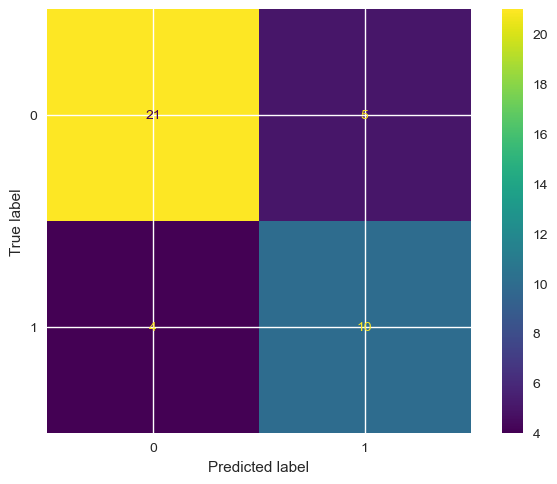

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.67      0.71      0.69        14

    accuracy                           0.78        40
   macro avg       0.75      0.76      0.76        40
weighted avg       0.78      0.78      0.78        40



In [89]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# predicting y based on Logistic regression on X test
y_pred_logreg = logreg.predict(X_test)

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Our logistic regression model yields a precision score of **67%** and a recall score of **71%**. 
In other words, our model is only able to predict correctly 67%. And out of all the participants who have experienced a fall, our model only prected 71% of them. 
Take a harmonic mean of these two metrics gives us an **F1 score of 69%**. 
We can explore other classification models to see if we can achieve higher metrics. 

# Model 2 - Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree classifier with max depth = 4 and min samples split = 5
dtc = DecisionTreeClassifier(max_depth = 4,
                             min_samples_split = 5,
                             random_state=42)
dtc.fit(X_train, y_train)
y_pred_tree = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy}')

Accuracy: 0.775


## Model Evaluation - Decision Tree

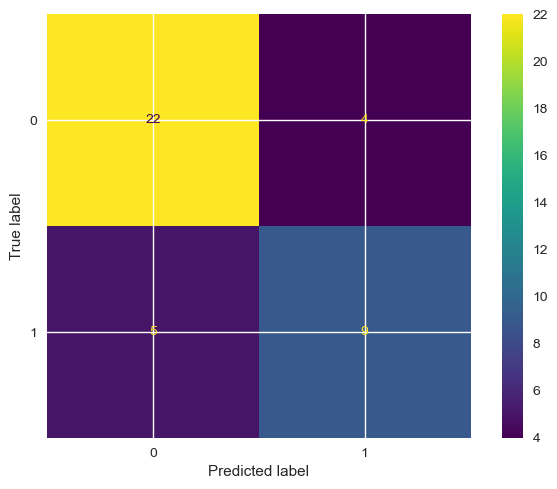

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.69      0.64      0.67        14

    accuracy                           0.78        40
   macro avg       0.75      0.74      0.75        40
weighted avg       0.77      0.78      0.77        40



In [93]:
# predicting y based on Logistic regression on X test
y_pred_dtc = dtc.predict(X_test)

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))

Our decision tree classifier achieved a **69%** precision and a **64%** recall score which results in an **F1 score of 67%**. Not an improvement from our random forest classifier and still not better than our logistic regression model. 

# Model 3 - Random Forest


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = {} # empty array placeholder for accuracy scores
estimators_range = [10,20,30,40,50,75,100,200] # range of estimators we will loop through

for n in estimators_range:
    rfc = RandomForestClassifier(n_estimators = n, random_state = 42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[n] = accuracy
    print(f'n_estimators: {n}, Accuracy: {accuracy}')

n_estimators: 10, Accuracy: 0.725
n_estimators: 20, Accuracy: 0.775
n_estimators: 30, Accuracy: 0.7
n_estimators: 40, Accuracy: 0.725
n_estimators: 50, Accuracy: 0.75
n_estimators: 75, Accuracy: 0.725
n_estimators: 100, Accuracy: 0.725
n_estimators: 200, Accuracy: 0.7


## Model Evaluation - Random forest

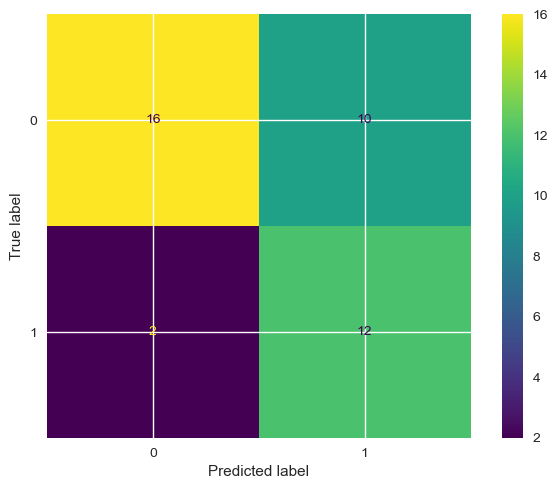

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        26
           1       0.55      0.86      0.67        14

    accuracy                           0.70        40
   macro avg       0.72      0.74      0.70        40
weighted avg       0.77      0.70      0.71        40



In [91]:
# predicting y based on Logistic regression on X test
y_pred_rfc = rfc.predict(X_test)

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))

Although our random forest classifier model performed better than our logistic regress in terms of a recall score (**86%**), it performed poorer in terms of its precision score (**55%**). In other words, the random forest classifier does a better job in detecting the participants who have experienced a fall, but does a relatively worse job at detecting the participants who have fallen vs. those who have not. Taking a harmonic mean of these two metrics gives us an **F1 score of 67%** which is lower than our logistic regression model.